# Algoritmos de aprendizaje automático supervisado

## Librerias

In [1]:
import numpy as np
import mglearn.datasets
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from mglearn.datasets import load_boston

## Algunos conjuntos de datos de muestra

X.shape: (26, 2)


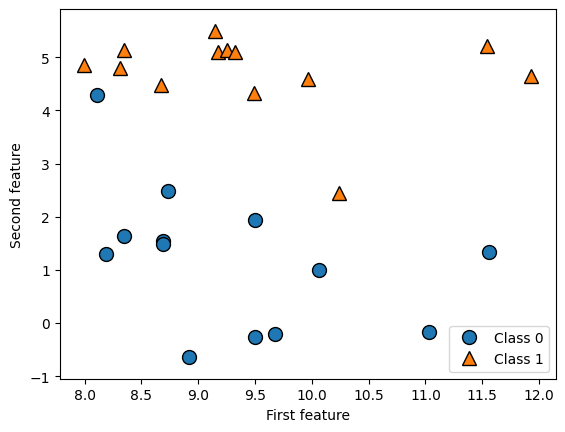

In [5]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Conjunto de ondas sinteticas, tiene una sola caracteristica de entrada y una variable objetivo continua.

Text(0, 0.5, 'Target')

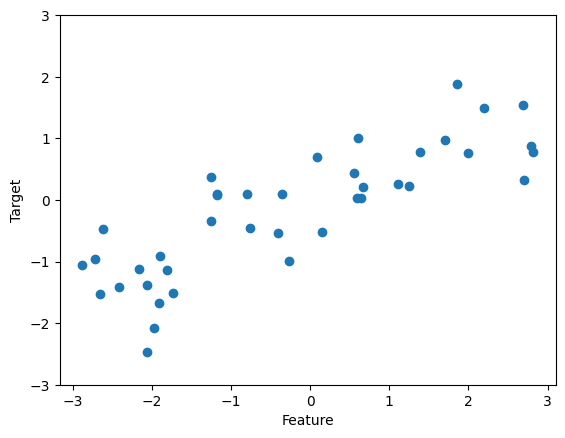

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

Ahora se usara un conjunto de datos del mundo real.
Este es el conjunto de datos Wisconsin Breast Cancer, que registra las mediciones clinicas de los tumores de cancer de mama.

In [3]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


El dataset consta de 569 puntos con 30 entidades cada uno.

In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


De estos 569 puntos de datos, 212 estan etiquetados como malignos y 357 como benignos.

In [7]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


Para obtener una descripcion del significado semantico de cada caracteristica, podemos observar el atributo feature_names

In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Datos de regresion del mundo real usando el conjunto de datos Boston Housing.

In [2]:
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


Conjunto de datos derivado.

In [3]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## K-Vecinos mas cercanos

El algoritmo de **K-Nearest Neighbors** es posiblemente el algoritmo de aprendizaje automatico mas simple.

La creacion del modelo consiste en almacenar el conjunto de datos de entrenamiento y para hacer la prediccion de un nuevo punto de datos el algoritmo encuentra los puntos mas cercanos.

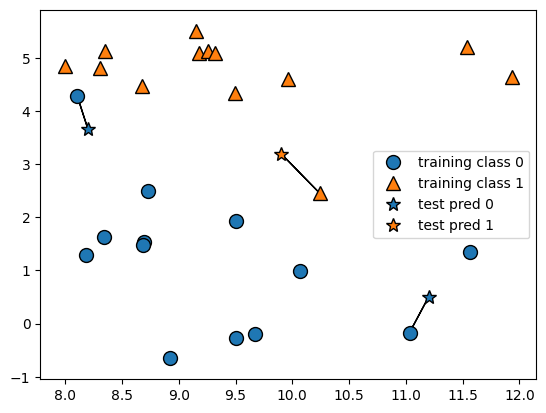

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)